# <center>Visualisations and Stats</center>

In [1]:
# for wordclouds
import pandas as pd
from wordcloud import WordCloud
from IPython.display import Image
from PIL import Image as imgWordcloud
import numpy as np
from nltk import word_tokenize

# from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# pd.options.display.max_colwidth = 50

## Visulisations for the data set

### Wordclouds

First we are gonna implement 3 word clouds. One for the whole dataset, one for the hate speech only and one for the neutral speech only

But before all, we have to load our data

In [2]:
data = pd.read_pickle("../MyData/twitter_hate_data.pkl")
# data.to_csv("../MyData/twitter_hate_data.csv")
# print(data['class'].unique())
# print(data[:15])

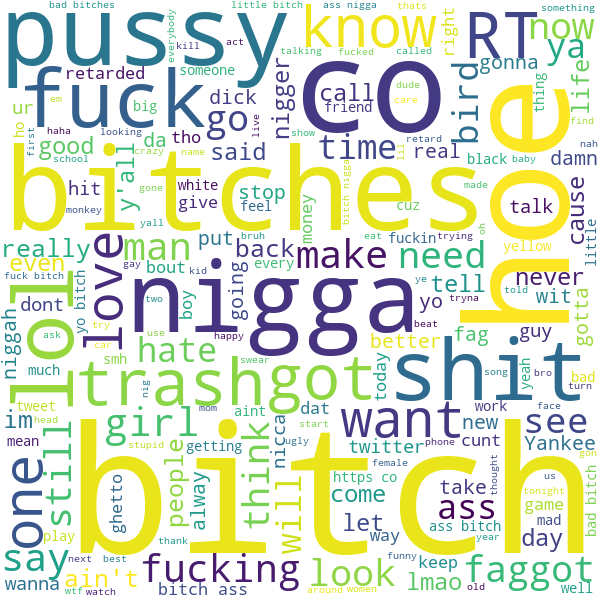

In [26]:
# make a text of all tweets
wholeText = ''
for tweetText in data['tweet']:
    wholeText = wholeText + ' ' + tweetText

wc = WordCloud(width=600, height=600, background_color='white')

wc.generate(wholeText)
wc.to_file('wholeTextWordcloud.png')

Image('wholeTextWordcloud.png')

We see that there are many slurs contained in this wordcloud. That gives us an insight that most tweets are labeled as hate speech. Also it makes us consider if there's something wrong with pople as a whole 

Make a dictionary that maps the class to a string that contains the whole text from the respective tweets. We will use each text in order to make a wordcloud


In [27]:
tweetCategories = list(set(data['class']))

# make a dictionary of form {category:contentString}
contentDict = {category: '' for category in tweetCategories}

# fill the content of each category
for (content, category) in zip(data['tweet'], data['class']):
    contentDict[category] = contentDict[category] + ' ' + content

First we are gonna make a wordcould for the neutral tweets

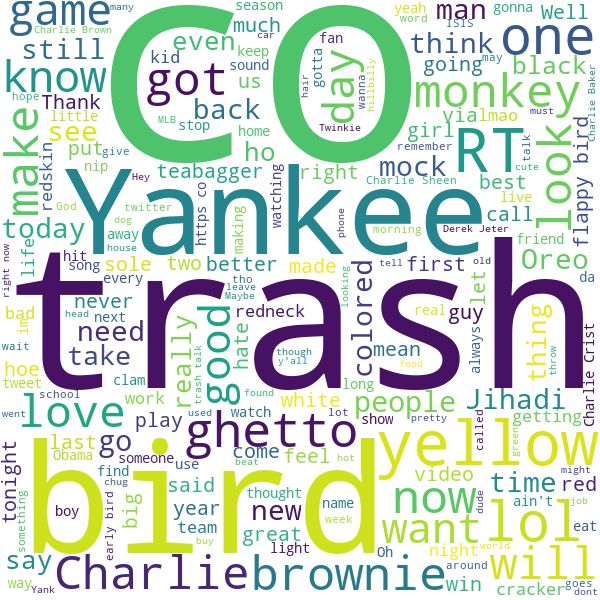

In [28]:
wc = WordCloud(width=600, height=600, background_color='white')

# generate word cloud
wc.generate(contentDict['neutral'])

# store to file
wc.to_file('neutralWordcloud.png')

Image('neutralWordcloud.png')

And now the hate speech tweets

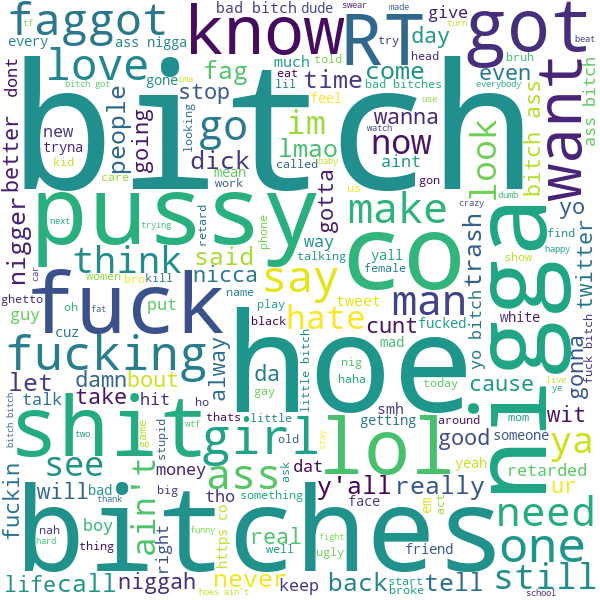

In [29]:
wc = WordCloud(width=600, height=600, background_color='white')

# generate word cloud
wc.generate(contentDict['hate speech'])

# store to file
wc.to_file('hateWordcloud.png')

Image('hateWordcloud.png')

People are really fond of the word bitch and nigga 🤔️

### Stats

In [9]:
counts = data.groupby(['class']).count()
counts

,tweet
class,
hate speech,20620
neutral,4163


Text(0.5, 1.0, 'Amount of Tweets')

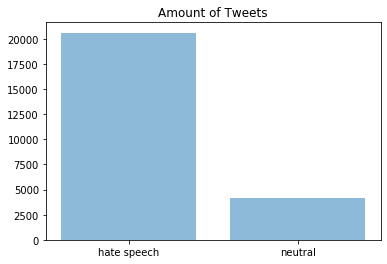

In [8]:
# y_pos = len(counts['class'])
y_pos = np.arange(len(('hate speech', 'neutral')))
objects = ('hate speech', 'neutral')
# print(objects)
# print(counts)
plt.bar(y_pos, counts['tweet'], align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Amount of Tweets')

From the above diagram it becomes obvious that the tweets labeled with hate speech are way more than the ones labeled as neutral. Using a training data set like this it will lead in overfiting our model. So we will have to drop some tweets probably

In [2]:
preprocessed_train_data = pd.read_csv("../MyData/twitter_train_preprocessed_data.csv", names=["index", "tweet"])
preprocessed_test_data = pd.read_csv("../MyData/twitter_test_preprocessed_data.csv", names=["index", "tweet"])

And now some stats

In [7]:
def calc_stats(data):
    total_len = 0;
    total_tokens = 0
    data_size = data.shape[0]

    max_token_count = 0
    min_token_count = 999999
    max_token_tweet = ''
    min_token_tweet = ''

    max_len = 0
    min_len = 999999

    max_len_tweet = ''
    min_len_tweet = ''

    for _, row in data.iterrows():
        text = row['tweet']
        total_len = total_len + len(text)
        tokens = word_tokenize(text)
        total_tokens = total_tokens + len(tokens)

        if len(tokens) > max_token_count:
            max_token_count = len(tokens)
            max_token_tweet = text

        if len(tokens) < min_token_count:
            min_token_count = len(tokens)
            min_token_tweet = text

        if len(text) > max_len:
            max_len = len(text)
            max_len_tweet = text

        if len(text) < min_len:
            min_len = len(text)
            min_len_tweet = text    

    avg_len = total_len/data_size
    avg_token_count = total_tokens/data_size

    print("We have a total of %d tweets" % (data_size)) 
    print()
    print("Average length of each tweet is\t\t%d" % (avg_len)   ) 
    print("Max length of each tweet is\t\t%d" %    (max_len)) 
    print("Min length of each tweet is\t\t%d" % (min_len)   ) 
    print()
    print("Anerage token count of each tweet is\t%d" % (avg_token_count) )
    print("Max token of each tweet is\t\t%d" % (max_token_count) )
    print("Min token of each tweet is\t\t%d" % (min_token_count) )
    print()
    print("The tweet with the most tokens is \"%s\"" % (max_token_tweet)  )
    print("The tweet with the least tokens is \"%s\"" % (min_token_tweet)  )
    print()
    print("The tweet with the most characters is \"%s\"" % (max_len_tweet)  )
    print("The tweet with the least characters is \"%s\"" % (min_len_tweet)  )

In [8]:
calc_stats(preprocessed_train_data)

We have a total of 19826 tweets

Average length of each tweet is		62
Max length of each tweet is		437
Min length of each tweet is		3

Anerage token count of each tweet is	14
Max token of each tweet is		139
Min token of each tweet is		1

The tweet with the most tokens is "rt like <allcaps>bmth<allcaps> <allcaps>adtr<allcaps> <allcaps>ptv<allcaps> <allcaps>ymas<allcaps> <allcaps>sws<allcaps> <allcaps>atl<allcaps> om&m aa <allcaps>miw<allcaps> <allcaps>btf<allcaps> <allcaps>wcar<allcaps> <allcaps>mcr<allcaps> <allcaps>afi<allcaps> pe <allcaps>bvb<allcaps> <allcaps>wim<allcaps> bc ss <allcaps>cte<allcaps> <allcaps>nsn<allcaps> gd <allcaps>watic<allcaps> aa! <allcaps>bfmv<allcaps> <allcaps>fob<allcaps> f…"
The tweet with the least tokens is "-slap-a-hoe"

The tweet with the most characters is "rt like <allcaps>bmth<allcaps> <allcaps>adtr<allcaps> <allcaps>ptv<allcaps> <allcaps>ymas<allcaps> <allcaps>sws<allcaps> <allcaps>atl<allcaps> om&m aa <allcaps>miw<allcaps> <allcaps>btf<allcaps> <allc

In [9]:
calc_stats(preprocessed_test_data)

We have a total of 4957 tweets

Average length of each tweet is		62
Max length of each tweet is		317
Min length of each tweet is		3

Anerage token count of each tweet is	14
Max token of each tweet is		89
Min token of each tweet is		1

The tweet with the most tokens is "<allcaps>ohh<allcaps> > <hashtag>whine<hashtag> <hashtag>whine<hashtag> <hashtag>whine<hashtag> says <hashtag>faggot<hashtag> <hashtag>ass<hashtag> <hashtag>steroid<hashtag> <allcaps>cream forgiving<allcaps> <hashtag>giants<hashtag> > is <hashtag>busterposey<hashtag> takin' shot <hashtag>barrybonds<hashtag> ? is it?"
The tweet with the least tokens is "uncivilized"

The tweet with the most characters is "<allcaps>ohh<allcaps> > <hashtag>whine<hashtag> <hashtag>whine<hashtag> <hashtag>whine<hashtag> says <hashtag>faggot<hashtag> <hashtag>ass<hashtag> <hashtag>steroid<hashtag> <allcaps>cream forgiving<allcaps> <hashtag>giants<hashtag> > is <hashtag>busterposey<hashtag> takin' shot <hashtag>barrybonds<hashtag> ? is it?"
The